# Gene vs Tumor type Heatmap for KCPG

In [1]:
source("~/bin/da.R")

## KCPG without AR 

In [2]:
k = read.csv("../HMaps/KCPG_wo_AR_gene_vs_tt.tsv", sep="\t")
kmat = as.matrix( k[-1] )
rownames(kmat) = k[,1]

In [3]:
kmat %>% head

,ACT,CNS,EWS,GCT,HGG,LGG,NBL,OS,OST,RB,RHB,STS,WLM,All
RB1,0.00000,0.0000000,0.000000,0.000000,0.0,0.000000,0.0000000,0.7751938,0,31.632653,0.0000000,0.000000,0.0000000,2.123424
NF1,0.00000,4.6439628,0.000000,0.000000,2.5,4.166667,1.0526316,0.0000000,0,0.000000,1.4925373,0.000000,0.0000000,1.459854
CHEK2,0.00000,1.8575851,3.157895,1.351351,0.0,0.000000,2.1052632,0.7751938,0,1.020408,0.7462687,0.000000,0.9661836,1.260783
TP53,31.81818,0.0000000,0.000000,0.000000,0.0,0.000000,0.5263158,0.7751938,0,0.000000,0.7462687,0.000000,0.0000000,0.663570
ATM,0.00000,0.9287926,1.052632,0.000000,0.0,0.000000,0.0000000,1.5503876,0,1.020408,0.7462687,1.075269,0.0000000,0.597213
COL7A1,0.00000,0.3095975,0.000000,0.000000,0.0,0.000000,0.5263158,0.0000000,0,1.020408,0.7462687,0.000000,1.9323671,0.530856


In [4]:
kmat %>% dim

[1] 54 14

In [5]:
kmat_x = kmat[,!grepl( 'OST|All', colnames(kmat))]
kmat_x = kmat_x[,c("ACT","RB","OS","STS","WLM","EWS", "GCT","HGG","LGG","CNS", "NBL","RHB")]

In [6]:
kmat_x %>% dim

[1] 54 12

In [7]:
save_pheatmap <- function(x, filename, width=800, height=1200) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   svg(filename, pointsize = 300)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

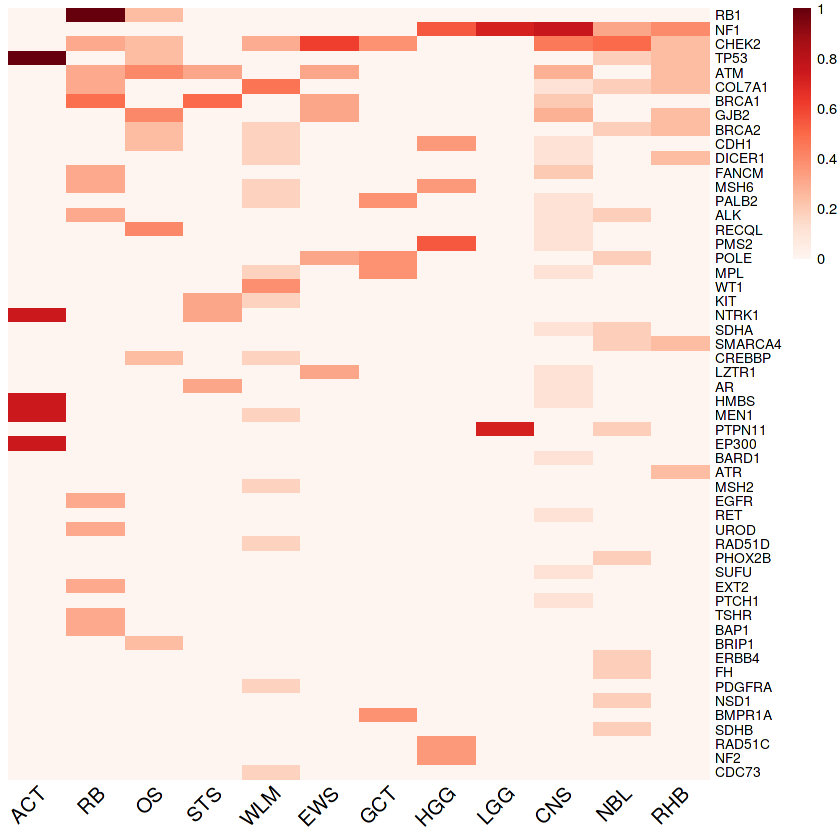

In [8]:
#ofp="../HMaps/kcpg_wo_AR_gene_vs_tt_log_red_06072019.svg"
cols = colorRampPalette(c("#fff5f0","#fee0d2","#fcbba1","#fc9272","#fb6a4a","#ef3b2c","#cb181d","#a50f15","#67000d"))(100)
breaksList = seq(0, 1, by = 0.01)
x=pheatmap(log10(kmat_x + 1),
           cluster_cols = F, 
           cluster_rows = F,
           border_color = F,
           color =cols,
           angle_col=45,
           fontsize = 8.5,
           fontsize_row=8,
           fontsize_col = 12,
           breaks=breaksList)
#save_pheatmap(x,ofp )

## Clustering

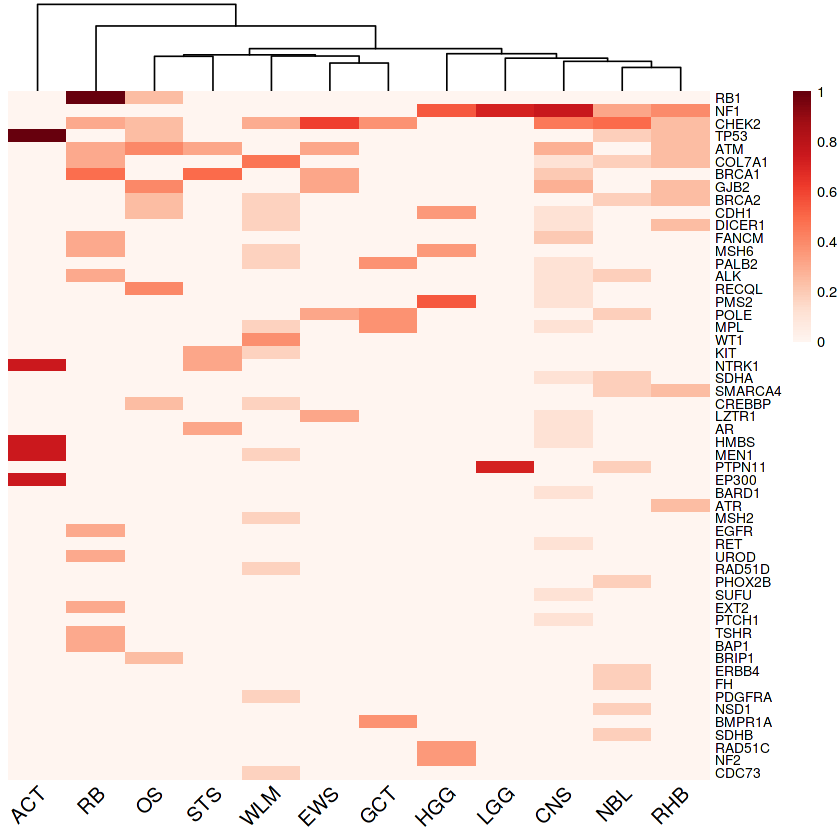

In [9]:
#ofp="../HMaps/KCPG_HM/kcpg_wo_AR_gene_vs_tt_log_red_06072019_cluster_HM.svg"
cols = colorRampPalette(c("#fff5f0","#fee0d2","#fcbba1","#fc9272","#fb6a4a","#ef3b2c","#cb181d","#a50f15","#67000d"))(100)
breaksList = seq(0, 1, by = 0.01)
x=pheatmap(log10(kmat_x + 1),
           cluster_cols = T, 
           cluster_rows = F,
           border_color = F,
           color =cols,
           angle_col=45,
           fontsize = 8.5,
           fontsize_row=8,
           fontsize_col = 12,
           breaks=breaksList)
#save_pheatmap(x,ofp )